In [1]:
from prody import *
from matplotlib.pylab import *
from sklearn import*
import sklearn
import numpy 
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

/home/akp47/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/akp47/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/akp47/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  

In [2]:
ion()

In [3]:
# using the pickle file from HAN getting the refined sequences

import _pickle as cPickle
SEQ, consensus = cPickle.load(open("SEQ_PF00595.pkl","rb"))
print (len(consensus))
print(len(SEQ))
msa = numpy.asarray(SEQ)
msa_refine = numpy.chararray((12886,81))
for i in range(12886):
    msa_refine[i] = msa[i]

81
12887


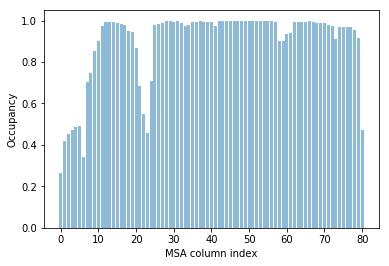

In [4]:
y = numpy.array([0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
calcMSAOccupancy(msa_refine, occ='res').min()
occ = calcMSAOccupancy(msa_refine, occ='res')
y_pos = numpy.arange(len(occ))
 
plt.bar(y_pos, occ, align='center', alpha=0.5)

plt.xlabel('MSA column index')
plt.ylabel('Occupancy')
 
plt.show()

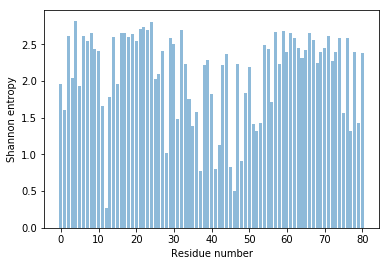

In [5]:
entropy = calcShannonEntropy(msa_refine)
y_pos = numpy.arange(len(occ))
 
plt.bar(y_pos, entropy, align='center', alpha=0.5)

plt.xlabel('Residue number')
plt.ylabel('Shannon entropy')
 
plt.show()

## Mutual Information

@> Mutual information matrix was calculated in 0.09s.


(<matplotlib.image.AxesImage at 0x7f2ec58db470>,
 <matplotlib.colorbar.Colorbar at 0x7f2ec5902e48>)

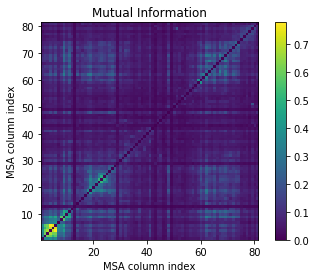

In [6]:
mutinfo = buildMutinfoMatrix(msa_refine)
showMutinfoMatrix(mutinfo)

In [7]:
from sklearn import metrics
mi_avg=numpy.mean(mutinfo,axis=0)
SEQ_LENGTH = 81;
dataauc=mi_avg
# Make attn = 1 if >0.1
y_ = np.zeros(SEQ_LENGTH)
y_ =[1*(dataauc[i]>(numpy.mean(dataauc)+1*numpy.std(dataauc))) for i in range(0,SEQ_LENGTH)  ]

#data_auc=metrics.auc(nums, y_)
#y_auc=metrics.auc(nums, y)
roc_auc = metrics.roc_auc_score(y,numpy.array(y_))
from sklearn.metrics import f1_score
f1=f1_score(y,numpy.array(y_), average='micro')  
print("F1:", f1,"ROC AUC:", roc_auc)

F1: 0.7407407407407407 ROC AUC: 0.4652777777777778


## MIp

(<matplotlib.image.AxesImage at 0x7f2ec5814550>,
 <matplotlib.colorbar.Colorbar at 0x7f2ec583dc18>)

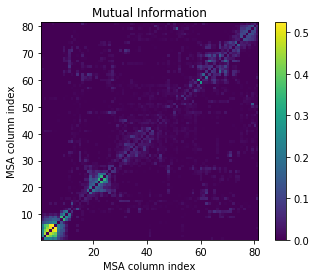

In [8]:
mutinfo_corr = applyMutinfoCorr(mutinfo, corr='apc')
showMutinfoMatrix(mutinfo_corr, clim=[0, mutinfo_corr.max()])

In [9]:
from sklearn import metrics
MIp_avg=numpy.mean(mutinfo_corr,axis=0)
SEQ_LENGTH = 81;
dataauc=MIp_avg
# Make attn = 1 if >0.1
y_ = numpy.zeros(SEQ_LENGTH)
y_ =[1*(dataauc[i]>(numpy.mean(dataauc)+1*numpy.std(dataauc))) for i in range(0,SEQ_LENGTH)  ]

#data_auc=metrics.auc(nums, y_)
#y_auc=metrics.auc(nums, y)
roc_auc = metrics.roc_auc_score(y,numpy.array(y_))
from sklearn.metrics import f1_score
f1=f1_score(y,numpy.array(y_), average='micro')  
print("F1:", f1,"ROC AUC:", roc_auc)

F1: 0.7530864197530863 ROC AUC: 0.47222222222222227


## OMES 

@> OMES matrix was calculated in 0.10s.


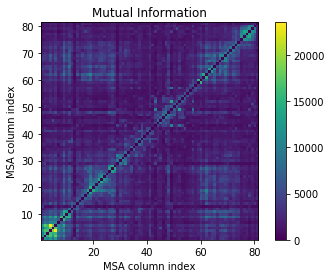

In [10]:
OMES_Matrix = buildOMESMatrix(msa_refine, ambiguity=True, turbo=True)
showMutinfoMatrix(OMES_Matrix, clim=[0, OMES_Matrix.max()]);

In [11]:
from sklearn import metrics
OMES_avg=numpy.mean(OMES_Matrix,axis=0)
SEQ_LENGTH = 81;
dataauc=OMES_avg
# Make attn = 1 if >0.1
y_ = numpy.zeros(SEQ_LENGTH)
y_ =[1*(dataauc[i]>(numpy.mean(dataauc)+1*numpy.std(dataauc))) for i in range(0,SEQ_LENGTH)  ]

#data_auc=metrics.auc(nums, y_)
#y_auc=metrics.auc(nums, y)
roc_auc = metrics.roc_auc_score(y,numpy.array(y_))
from sklearn.metrics import f1_score
f1=f1_score(y,numpy.array(y_), average='micro')  
print("F1:", f1,"ROC AUC:", roc_auc)

F1: 0.7777777777777778 ROC AUC: 0.48611111111111116


## PSICOV 

@> PC matrix was calculated in 7.97s.


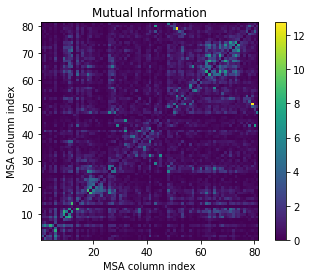

In [12]:
PSICOV= buildPCMatrix(msa_refine)
showMutinfoMatrix(PSICOV);

In [13]:
from sklearn import metrics
psicov_avg=numpy.mean(PSICOV,axis=0)
SEQ_LENGTH = 81;
dataauc=psicov_avg
# Make attn = 1 if >0.1
y_ = numpy.zeros(SEQ_LENGTH)
y_ =[1*(dataauc[i]>(numpy.mean(dataauc)+1*numpy.std(dataauc))) for i in range(0,SEQ_LENGTH)  ]

#data_auc=metrics.auc(nums, y_)
#y_auc=metrics.auc(nums, y)
roc_auc = metrics.roc_auc_score(y,numpy.array(y_))
from sklearn.metrics import f1_score
f1=f1_score(y,numpy.array(y_), average='micro')  
print("F1:", f1,"ROC AUC:", roc_auc)

F1: 0.7654320987654321 ROC AUC: 0.625


## SCA 

@> SCA matrix was calculated in 0.25s.


(<matplotlib.image.AxesImage at 0x7f2ec56778d0>,
 <matplotlib.colorbar.Colorbar at 0x7f2ec56262e8>)

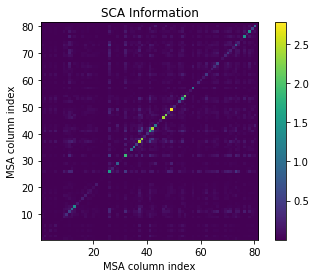

In [14]:
SCA = buildSCAMatrix(msa_refine, turbo=False)
showSCAMatrix(SCA)

In [15]:
from sklearn import metrics
sca_avg=numpy.mean(SCA,axis=0)
SEQ_LENGTH = 81;
dataauc=sca_avg
# Make attn = 1 if >0.1
y_ = numpy.zeros(SEQ_LENGTH)
y_ =[1*(dataauc[i]>(numpy.mean(dataauc)+1*numpy.std(dataauc))) for i in range(0,SEQ_LENGTH)  ]

#data_auc=metrics.auc(nums, y_)
#y_auc=metrics.auc(nums, y)
roc_auc = metrics.roc_auc_score(y,numpy.array(y_))
from sklearn.metrics import f1_score
f1=f1_score(y,numpy.array(y_), average='micro')  
print("F1:", f1,"ROC AUC:", roc_auc)

F1: 0.7654320987654321 ROC AUC: 0.4791666666666667


## DCA 

@> DI matrix was calculated in 15.13s.


(<matplotlib.image.AxesImage at 0x7f2ec569b940>,
 <matplotlib.colorbar.Colorbar at 0x7f2ec57f8c88>)

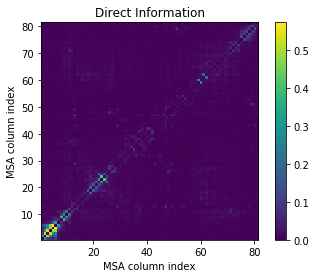

In [16]:
DI_Matrix = buildDirectInfoMatrix(msa_refine, turbo=False)
showDirectInfoMatrix(DI_Matrix)

In [17]:
from sklearn import metrics
DI_avg=numpy.mean(DI_Matrix,axis=0)
SEQ_LENGTH = 81;
dataauc=DI_avg
# Make attn = 1 if >0.1
y_ = numpy.zeros(SEQ_LENGTH)
y_ =[1*(dataauc[i]>(numpy.mean(dataauc)+1*numpy.std(dataauc))) for i in range(0,SEQ_LENGTH)  ]

#data_auc=metrics.auc(nums, y_)
#y_auc=metrics.auc(nums, y)
roc_auc = metrics.roc_auc_score(y,numpy.array(y_))
from sklearn.metrics import f1_score
f1=f1_score(y,numpy.array(y_), average='micro')  
print("F1:", f1,"ROC AUC:", roc_auc)

F1: 0.8148148148148148 ROC AUC: 0.5555555555555556
